### SMOTE- Synthetic Minority Oversampling Technique
It is a technique used in machine learning to address imbalanced datasets where the minority class has significntly fewer instances as majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification

In [5]:
# n-feature:it will make 2-d strucutre, weight:1st class is 90%  more than 2nd class,random_state:it will set up seed
# redundant: remove the repeated values (it can use for large values)
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)
#  x is independent and y is dependent feature

In [6]:
# create a dataframe now 
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [7]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

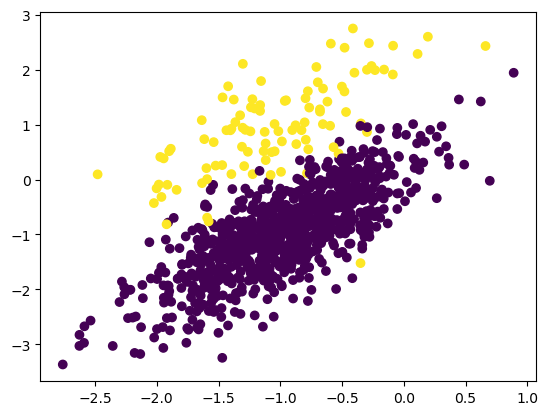

In [10]:
import matplotlib.pyplot as plt 
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
plt.show()          # yellow = minority and purple = majority datapoints

In [12]:
# Now apply smote and make both datapoints equal in number
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 23.7 MB/s eta 0:00:00


In [14]:
from imblearn.over_sampling import SMOTE 
# SMOTE will connect 2 points and then generate some datapoints to make both data equal

In [15]:
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])#First independent feature then dependent feature

In [18]:
x.shape  # oversample from 900 to 1800

(1800, 2)

In [19]:
y.shape   # oversample from 100 to 1800

(1800,)

In [20]:
len(y[y==0])   # both 0  and 1 value are equal now

900

In [21]:
len(y[y==1])  # earlier 1 was 100 only

900

In [16]:
# create a dataframe now 
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


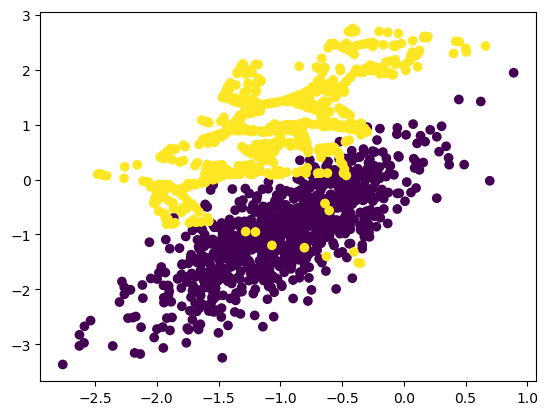

In [17]:
import matplotlib.pyplot as plt 
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
plt.show()          # yellow = minority and purple = majority datapoints both are equal now